## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.


In [2]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

Создайте датафреймы X и y из этих данных.

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['Price'])

In [4]:
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.


In [6]:
# scaler = StandardScaler(with_mean=False)
scaler = StandardScaler()

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [8]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42, )


In [10]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)


Постройте диаграмму рассеяния на этих данных.

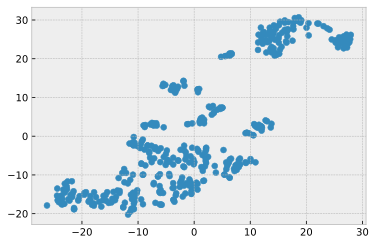

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,km
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [12]:
from sklearn.cluster import KMeans

In [13]:
clusters = 3

In [14]:
kmeans = KMeans(n_clusters=clusters, max_iter=100, random_state=42)

In [15]:
labels_train = kmeans.fit_predict(X_train_scaled)
labels_test = kmeans.fit_predict(X_test_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

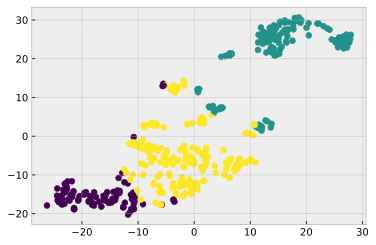

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train);

Вычислите средние значения price и CRIM в разных кластерах.

In [17]:
for i in range(clusters):
    mean_price = y_train[labels_train==i].mean()
    mean_crim = X_train.loc[labels_train==i, 'CRIM'].mean()
    print(f'Кластер {i}    Средняя цена {float(mean_price):.3f}    Криминал {float(mean_crim):.3f} \n')
    

Кластер 0    Средняя цена 27.788    Криминал 0.074 

Кластер 1    Средняя цена 16.165    Криминал 10.797 

Кластер 2    Средняя цена 24.958    Криминал 0.422 



Видно, что цена сильно зависит от криминальности района. Однако, если увеличить количество кластеров до 6 и выше, становится видно, что это далеко не единственный фактор, и самые дорогие районы не самые безопасные.


## Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [18]:
for i in range(clusters):
    mean_price_test = y_test[labels_test==i].mean()
    mean_crim_test = X_test.loc[labels_test==i, 'CRIM'].mean()
    print(f'Кластер {i}    Средняя цена {float(mean_price_test):.3f}    Криминал {float(mean_crim_test):.3f} \n')

Кластер 0    Средняя цена 34.554    Криминал 0.083 

Кластер 1    Средняя цена 16.711    Криминал 9.419 

Кластер 2    Средняя цена 21.718    Криминал 0.223 



Решил построить диаграмму, объединив тренировочную и тестовую выборки, но раскрасить их в разные цвета.
Для начала, диаграмма тестовой выборки.


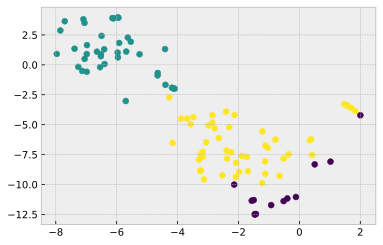

In [19]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test);

In [20]:
labels = np.hstack([labels_train, labels_test+3])
len(labels)

506

In [21]:
X_concat_tsne = np.vstack([X_train_tsne, X_test_tsne])


In [22]:
X_all_scaled = pd.concat([X_train_scaled, X_test_scaled], axis=0)
y_all = pd.concat([y_train, y_test], axis=1)

In [23]:
X_all_tsne = tsne.fit_transform(X_all_scaled)

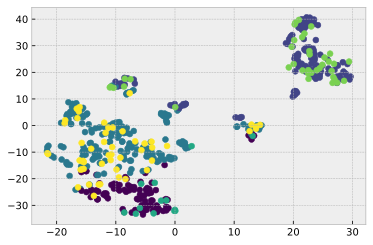

In [24]:
plt.scatter(X_all_tsne[:, 0], X_all_tsne[:, 1], c=labels);

Видно что в зависимости от данных, двумерное пространство признаков меняется, и графики получаются разной формы.
Но так же, что модель работает, на графике по прежнему три кластера, каждый окрашен двумя цветами, и в целом границы для тестовой и тренировочной выборки совпадают

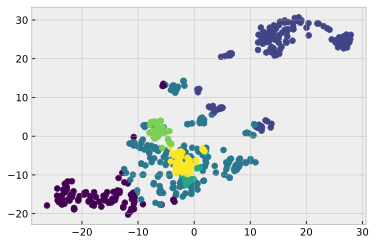

In [25]:
plt.scatter(X_concat_tsne[:, 0], X_concat_tsne[:, 1], c=labels);

На графике выше - совмещение признаков, полученных алгоритмом TSNE для тестовой и тренировочной выборок. Видно, что алгоритм по разному отработал, и создал разные двумерные пространства признаков для теста и тренировки.

Хотя алгоритм и отработал, я не могу использовать полученные данные о кластерах для создания дополнительных признаков датасета и улучшении прогноза. На "боевых" данных будет другое, заранее не известное пространство признаков. Склеить данные с тренировочными, и применить t-SNE ко всему, как в предыдущем примере - тоже не получится. Теряется сам смысл предсказания.

Возможно ли как-то "зафиксировать" работу алгоритма, чтобы он приводил новые данные к тем же признакам, того же масштаба, что и тренировочную выборку? И, соответственно, данные из X_test ложились бы "на свои места"? 

https://d2xzmw6cctk25h.cloudfront.net/record/26702/attachment/1db48ccf85c71ea45d4f01138ba06eb1.mp4

https://d2xzmw6cctk25h.cloudfront.net/record/26931/attachment/e2256870a653c0b62e9af759d51aff16.mp4

https://d2xzmw6cctk25h.cloudfront.net/record/27162/attachment/92b6964a9c7ec676de0151a357ff3f8e.mp4

https://d2xzmw6cctk25h.cloudfront.net/record/27376/attachment/41cfc3bfcf09485b1b0a53aad6ef826d.mp4

https://d2xzmw6cctk25h.cloudfront.net/record/27561/attachment/8dfaa6b55dea9ee70dc119e686aa7f5c.mp4

https://d2xzmw6cctk25h.cloudfront.net/record/27678/attachment/fbab5155637f20a8ce154999dd5089e1.mp4

https://d2xzmw6cctk25h.cloudfront.net/record/27840/attachment/6e2590cc9640689fe36ea7f757ccfba2.mp4

https://d2xzmw6cctk25h.cloudfront.net/record/28017/attachment/d2891ff74c31750eba4475206776da7e.mp4